In [225]:
import random
import pandas as pd
import numpy as np

df = pd.read_csv("data/reddit2017.csv", header=0)
un, counts = np.unique(df["Domain"].as_matrix(), return_counts=True)
#print(un)
#print(counts)

selected_domains = []
for i in range(0, len(un)):
    if counts[i] > 350:
        selected_domains.append(un[i])
selected_domains = ["foxnews.com", "aljazeera.com", "bbc.co.uk",
                    "bloomberg.com",
                   "reuters.com"]

selected_domains = ['abcnews.go.com','aljazeera.com','bbc.com','bloomberg.com',
 'cbc.ca','cnn.com','dw.com','foxnews.com',
 'independent.co.uk','nytimes.com','reuters.com','rt.com','uk.reuters.com','washingtonpost.com']

df = df[df["Domain"].isin(selected_domains)]
un, counts = np.unique(df["Domain"].as_matrix(), return_counts=True)
print(un)
print(counts)
min_counts = min(counts)
#print(min_counts)

train = pd.DataFrame()
test = pd.DataFrame()

for i in range(0, len(selected_domains)):
    domain = selected_domains[i]
    ddf = df[df["Domain"] == domain]
    ddf = ddf.head(min_counts)
    msk = np.random.rand(len(ddf)) < 0.8
    train = train.append(ddf[msk])
    test = test.append(ddf[~msk])

train.to_csv( "data/train.csv", index=False, quotechar='"',escapechar='\\')
test.to_csv( "data/test.csv", index=False, quotechar='"',escapechar='\\')

['abcnews.go.com' 'aljazeera.com' 'bbc.com' 'bloomberg.com' 'cbc.ca'
 'cnn.com' 'dw.com' 'foxnews.com' 'independent.co.uk' 'nytimes.com'
 'reuters.com' 'rt.com' 'uk.reuters.com' 'washingtonpost.com']
[ 822  525 2165  436  441  572  604  381 2046  482 3719  572  441  394]


In [226]:
import pandas as pd
train = pd.read_csv("data/train.csv", header=0)

In [227]:
import nltk
from nltk.corpus import stopwords
#print (stopwords.words("english") )
from bs4 import BeautifulSoup
import re

In [228]:
def title_to_words( raw_title ):
    title_text = BeautifulSoup(raw_title).get_text()     
    letters_only = re.sub("[^a-zA-Z]", " ", title_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [229]:
num_titles = train["Title"].size
clean_train_titles = []
for i in range( 0, num_titles ):
    if( (i+1)%1000 == 0 ):
        print ("Title %d of %d" % ( i+1, num_titles ))
    clean_train_titles.append( title_to_words( train["Title"][i] ) )

/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Title 1000 of 4301
Title 2000 of 4301
Title 3000 of 4301
Title 4000 of 4301


In [231]:
print ("Creating the bag of words...")
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

train_data_features = vectorizer.fit_transform(clean_train_titles)
train_data_features = train_data_features.toarray()
print (train_data_features.shape)

Creating the bag of words...
(4301, 5000)


In [232]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 50)
forest = forest.fit( train_data_features, train["Domain"] )

Training the random forest...


(1033, 3)
Cleaning and parsing the test set titles...



/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Title 1000 of 1033
31.07% accuracy for 14 classes.
['abcnews.go.com', 'aljazeera.com', 'bbc.com', 'bloomberg.com', 'cbc.ca', 'cnn.com', 'dw.com', 'foxnews.com', 'independent.co.uk', 'nytimes.com', 'reuters.com', 'rt.com', 'uk.reuters.com', 'washingtonpost.com']
[[ 8  6  2  4  2  3  3  6  4 12 10  2  1  6]
 [ 5 23  4  5  1 14  1  4  5 13  1  1  5  4]
 [ 7  1 33  5  1  3  0  1  2 12  1  1  3  1]
 [ 0  1  1 30  0  4  4  4  0 12  4  3  2  2]
 [ 2  5  1  7 35  3  0  0  0 18  3  2  1  2]
 [ 7  3  4  6  4 30  1  1  2 13  1  3  1  1]
 [ 4 15  1  4  1  4 28  6  3  4  1  2  0  4]
 [ 8  6  3  2  6 13  5 15  1 12  2  6  1  2]
 [ 2  4  1  6  0  5  1  1 30  5  1  1  1  3]
 [ 3  4  4 12  0  6  3  3  0 24  2  2  1  0]
 [ 6  6  4 11  2  4  1  3  8  8 19  1  6  4]
 [ 2  9  6  2  1 10  6  3  3  6  0 10  1  5]
 [ 1  4  4 11  1  3  5  4  3  8  9  3 19  4]
 [ 2  5  2  8  0  9  4  2  0 19  2  2  2 17]]


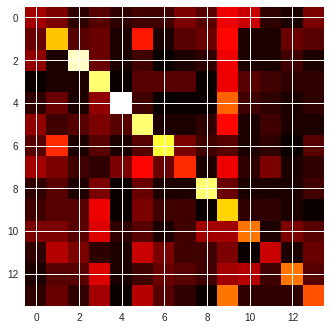

In [233]:
test = pd.read_csv("data/test.csv", header=0)
print (test.shape)
num_titles = len(test["Title"])
clean_test_titles = [] 

print( "Cleaning and parsing the test set titles...\n")
for i in range(0,num_titles):
    if( (i+1) % 1000 == 0 ):
        print ("Title %d of %d" % (i+1, num_titles))
    clean_title = title_to_words( test["Title"][i] )
    clean_test_titles.append( clean_title )

test_data_features = vectorizer.transform(clean_test_titles)
test_data_features = test_data_features.toarray()

result = forest.predict(test_data_features)

output = pd.DataFrame( data={"Title":test["Title"], "Domain":result} )

#output.to_csv( "Bag_of_Words_model.csv", index=False, quotechar='"',escapechar='\\')

correct = 0
for i in range(0, num_titles):
    if output["Domain"][i] == test["Domain"][i]:
        correct = correct + 1
print (str(round(100 * correct / num_titles, 2)) + "% accuracy for " + str(len(selected_domains)) + " classes.")
print (selected_domains)

from sklearn.metrics import confusion_matrix
y_true = test["Domain"]
y_pred = output["Domain"]

cm = confusion_matrix(y_true, y_pred)
print (cm)
import matplotlib.pyplot as plt
plt.imshow(cm, cmap='hot', interpolation='nearest')
plt.show()